In [1]:
#for data analysis
import numpy as np
from numpy import array
from numpy import argmax
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

#for visualistions
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(palette='Paired')

#for data preprocessing and preperation
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("ecommerce_customer_data.csv")

In [3]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [4]:
df.shape

(250000, 13)

In [5]:
# Get basic summary statistics
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [6]:
df.describe(include='O')

,Purchase Date,Product Category,Payment Method,Customer Name,Gender
count,250000,250000,250000,250000,250000
unique,249728,4,3,39878,2
top,2020-10-16 09:27:42,Electronics,Credit Card,Michael Johnson,Male
freq,2,62630,83547,119,125676


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [8]:
df.duplicated().sum()

0

### Checking for Missing Values

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
missing_values

Missing Values:


Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [10]:
# Replace missing 'Returns' values with a suitable default value
default_return_value = 0
df['Returns'].fillna(default_return_value, inplace=True)

df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [11]:
# Convert 'Purchase Date' to datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Extract year and month from 'Purchase Date'
df['Purchase Year'] = df['Purchase Date'].dt.year
df['Purchase Month'] = df['Purchase Date'].dt.month

In [12]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Purchase Year,Purchase Month
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,2023,5
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0,2021,5
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0,2020,7
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0,2023,1
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0,2021,5


### Distribution of customers by age and gender

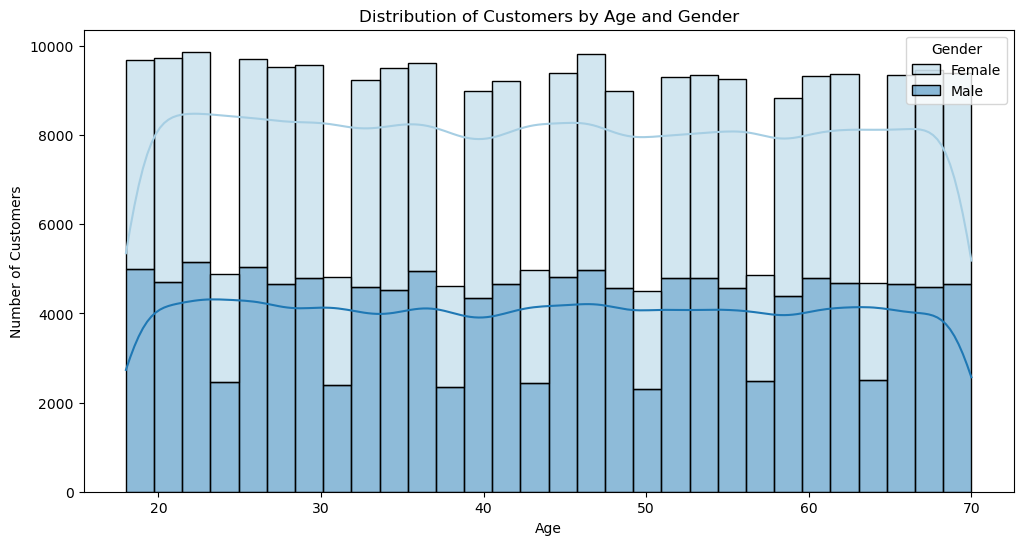

In [13]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot the distribution of customers by age and gender
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', bins=30, kde=True)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age and Gender')

# Show the plot
plt.show()

### Average purchase amount by gender

In [14]:
# Calculate the average purchase amount by gender
average_purchase_by_gender = df.groupby('Gender')['Total Purchase Amount'].mean()

# Display the result
print(average_purchase_by_gender)

Gender
Female    2723.202728
Male      2727.544185
Name: Total Purchase Amount, dtype: float64


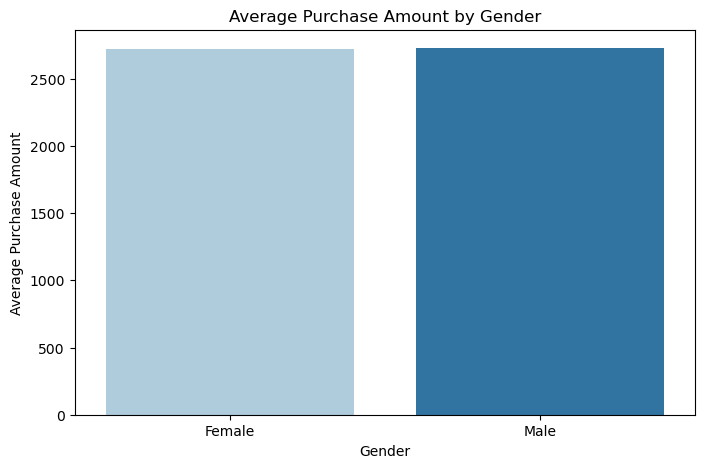

In [15]:
# Set up the figure and axis
plt.figure(figsize=(8, 5))

# Plot the average purchase amount by gender
sns.barplot(x=average_purchase_by_gender.index, y=average_purchase_by_gender.values)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Gender')

# Show the plot
plt.show()

### Top 4 popular product categories

In [16]:
# Group by product category, count occurrences, and sort by count in descending order
top_categories = df['Product Category'].value_counts().reset_index(name='Count').rename(columns={'index': 'Product Category'})

# Display the top 4 popular product categories
top_4_categories = top_categories.head(4)
print(top_4_categories)

  Product Category  Count
0      Electronics  62630
1         Clothing  62581
2             Home  62542
3            Books  62247


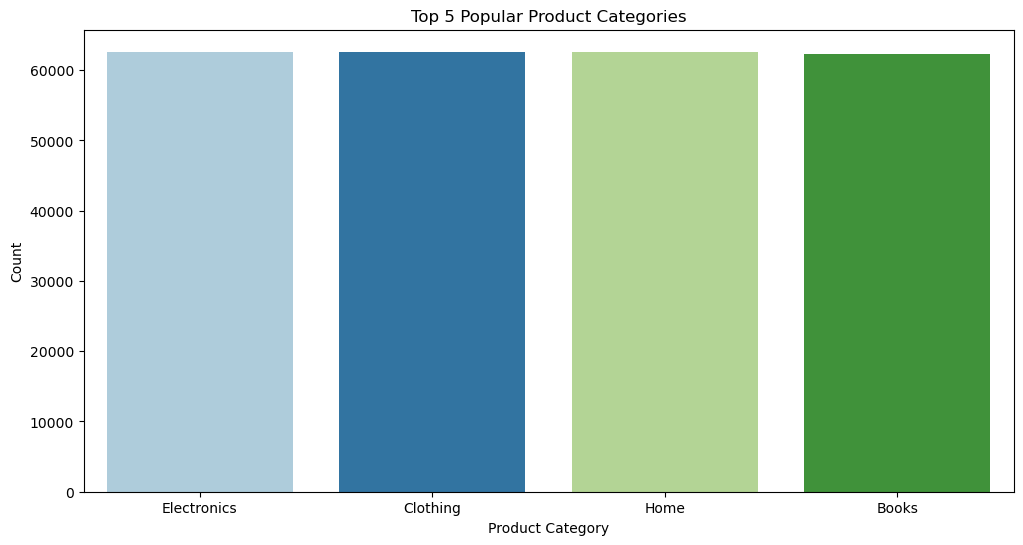

In [17]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot the top 5 popular product categories
sns.barplot(x='Product Category', y='Count', data=top_4_categories)

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Top 5 Popular Product Categories')

# Show the plot
plt.show()

### Frequency Distribution of Purchase Dates

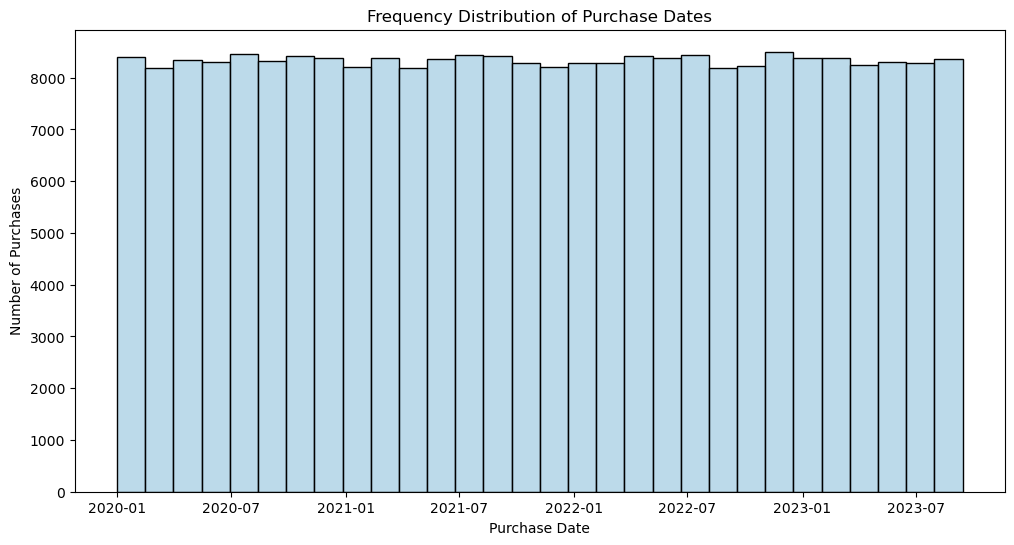

In [18]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot the frequency distribution of purchase dates
sns.histplot(df['Purchase Date'], bins=30, kde=False)

# Set labels and title
plt.xlabel('Purchase Date')
plt.ylabel('Number of Purchases')
plt.title('Frequency Distribution of Purchase Dates')

# Show the plot
plt.show()

### Average quantity of products purchased in a single transaction

In [19]:
# Calculate the average quantity of products purchased in a single transaction
average_quantity_per_transaction = df.groupby('Product Category')['Quantity'].mean()

# Calculate the overall average quantity
overall_average_quantity = average_quantity_per_transaction.mean()

# Display the result
print(f"Average quantity of products purchased in a single transaction: {overall_average_quantity:.2f}")

Average quantity of products purchased in a single transaction: 3.00


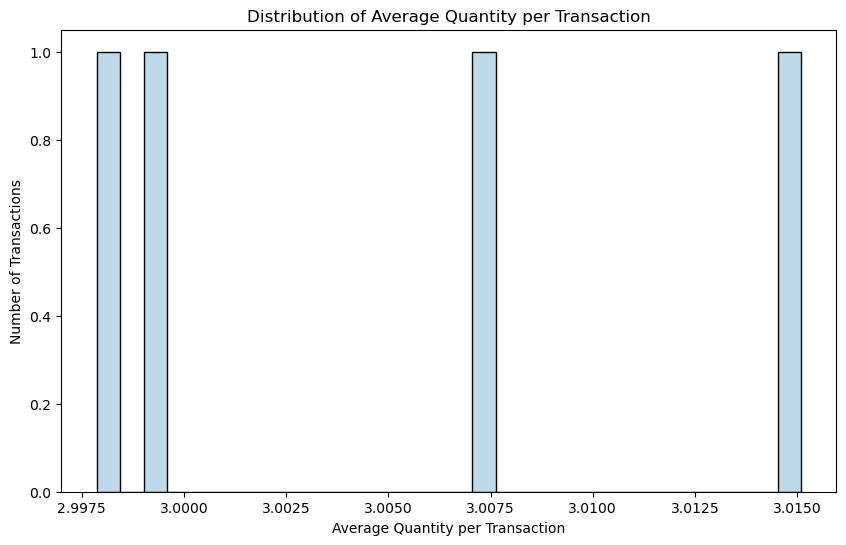

In [20]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot the distribution of quantities per transaction
sns.histplot(df.groupby('Product Category')['Quantity'].mean(), bins=30, kde=False)

# Set labels and title
plt.xlabel('Average Quantity per Transaction')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Average Quantity per Transaction')

# Show the plot
plt.show()

### Most Popular Product Categories and Their Average Prices

In [21]:
# Group by product category, calculate total purchase amount and count
category_stats = df.groupby('Product Category')['Total Purchase Amount'].agg(['sum', 'count']).reset_index()

# Calculate average price for each category
category_stats['Average Price'] = category_stats['sum'] / category_stats['count']

# Sort by total purchase amount to find the most popular categories
category_stats = category_stats.sort_values(by='sum', ascending=False)

# Display the result
print(category_stats[['Product Category', 'sum', 'count', 'Average Price']].head())

  Product Category        sum  count  Average Price
3             Home  171138916  62542    2736.383806
1         Clothing  170716122  62581    2727.922564
2      Electronics  170146025  62630    2716.685694
0            Books  169345236  62247    2720.536508


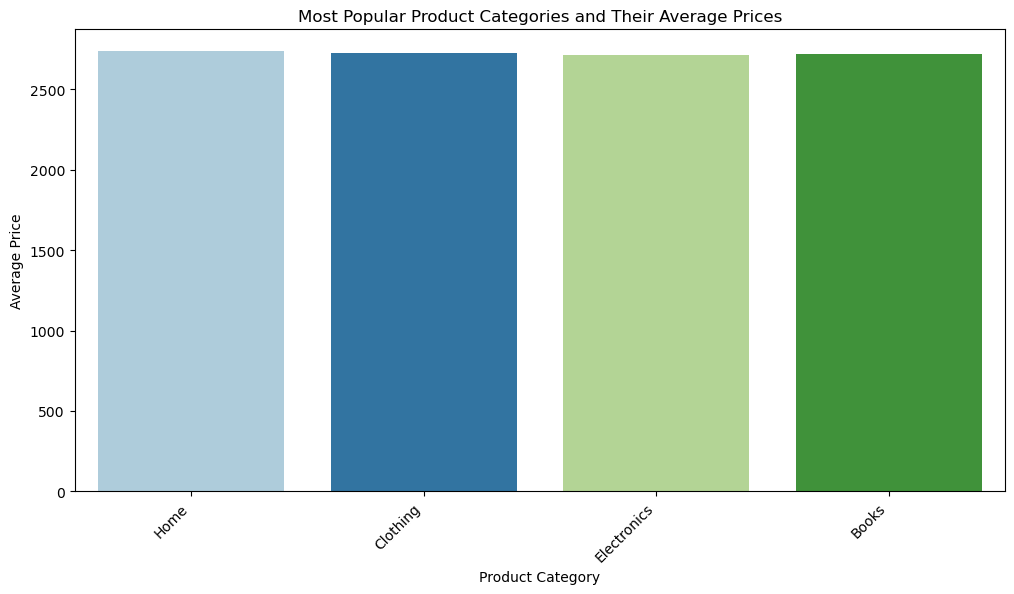

In [22]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot the most popular product categories and their average prices
sns.barplot(x='Product Category', y='Average Price', data=category_stats.head(10))

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.title('Most Popular Product Categories and Their Average Prices')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### Distribution of Total Purchase Amounts

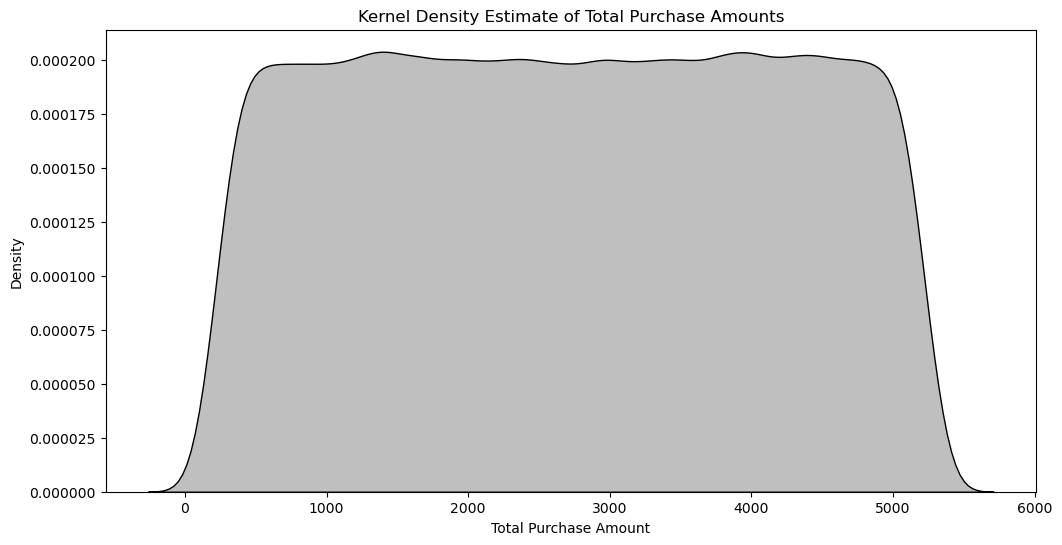

In [23]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot the kernel density estimate of total purchase amounts with black color
sns.kdeplot(df['Total Purchase Amount'], fill=True, color='black')

# Set labels and title
plt.xlabel('Total Purchase Amount')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Total Purchase Amounts')

# Show the plot
plt.show()

### Distribution of Payment Methods Used by Customers

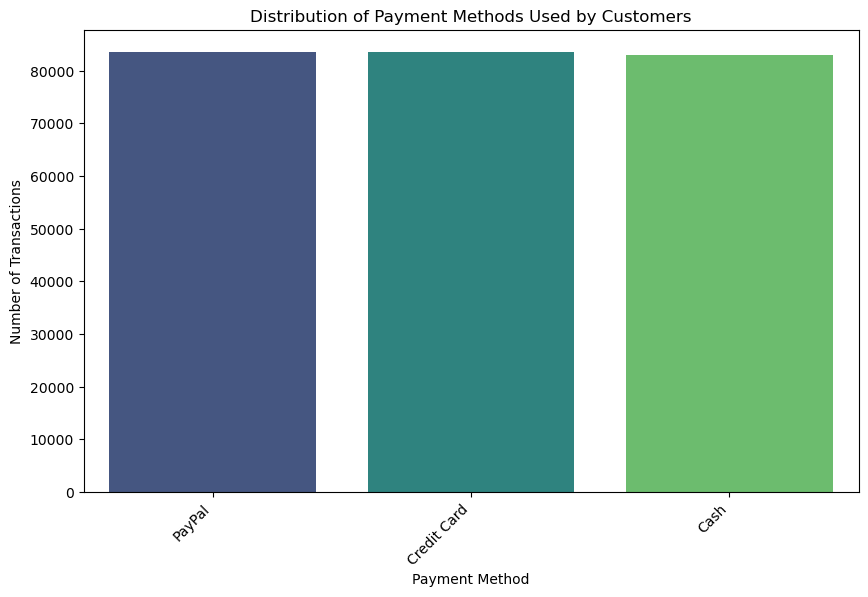

In [24]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot the distribution of payment methods
sns.countplot(x='Payment Method', data=df, palette='viridis')

# Set labels and title
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Payment Methods Used by Customers')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### Average Purchase Amount by Payment Method

In [25]:
# Calculate the average purchase amount by payment method
average_purchase_by_payment_method = df.groupby('Payment Method')['Total Purchase Amount'].mean()

# Display the result
print(average_purchase_by_payment_method)

Payment Method
Cash           2715.557437
Credit Card    2738.852562
PayPal         2721.677952
Name: Total Purchase Amount, dtype: float64


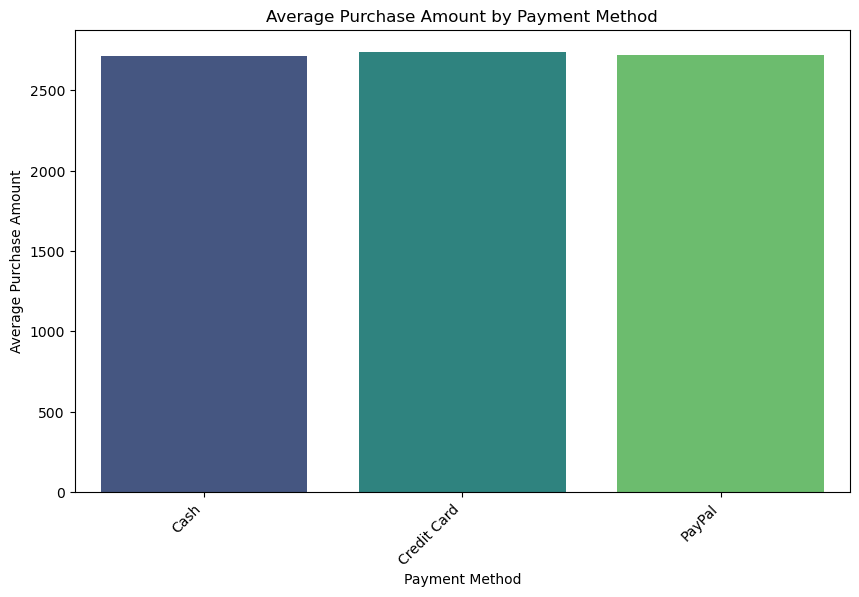

In [26]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot the average purchase amount by payment method
sns.barplot(x=average_purchase_by_payment_method.index, y=average_purchase_by_payment_method.values, palette='viridis')

# Set labels and title
plt.xlabel('Payment Method')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Payment Method')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### Most Commonly Returned Product Categories

In [27]:
# Group by product category and calculate the total number of returns
returns_by_category = df.groupby('Product Category')['Returns'].sum()

# Sort in descending order to find the most commonly returned product categories
most_returned_categories = returns_by_category.sort_values(ascending=False)

# Display the result
print(most_returned_categories)

Product Category
Electronics    25448.0
Books          25406.0
Home           25320.0
Clothing       25302.0
Name: Returns, dtype: float64


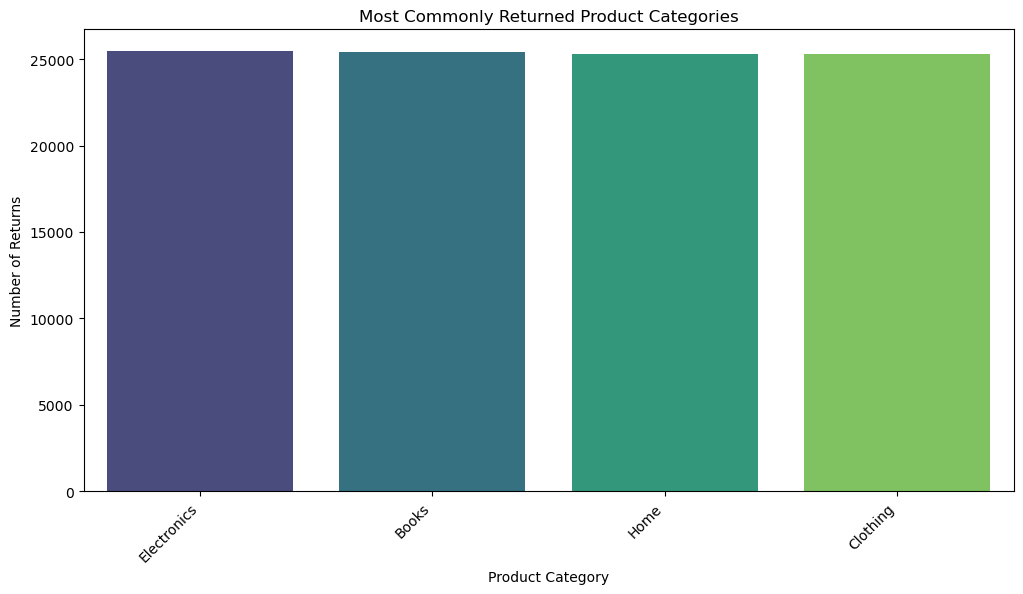

In [28]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot the most commonly returned product categories
sns.barplot(x=most_returned_categories.index, y=most_returned_categories.values, palette='viridis')

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Number of Returns')
plt.title('Most Commonly Returned Product Categories')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### Returns by Gender

Gender
Female    50284.0
Male      51192.0
Name: Returns, dtype: float64


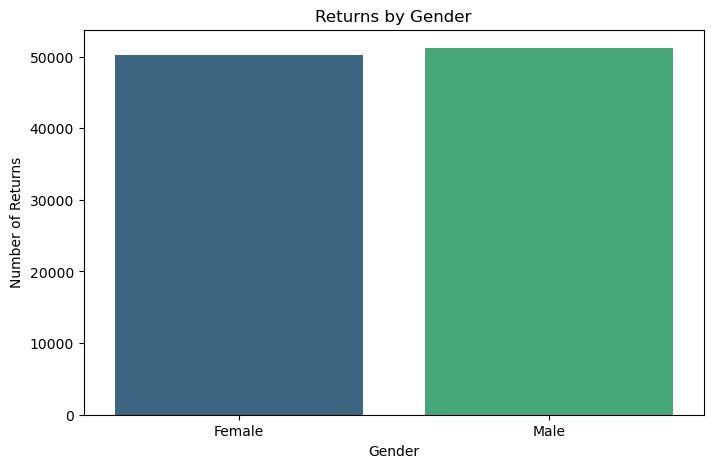

In [29]:
# Group by gender and calculate the total number of returns
returns_by_gender = df.groupby('Gender')['Returns'].sum()

# Display the result
print(returns_by_gender)

# Visualize the results with a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=returns_by_gender.index, y=returns_by_gender.values, palette='viridis')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Returns')
plt.title('Returns by Gender')

# Show the plot
plt.show()

### Monthly Trends in Total Sales

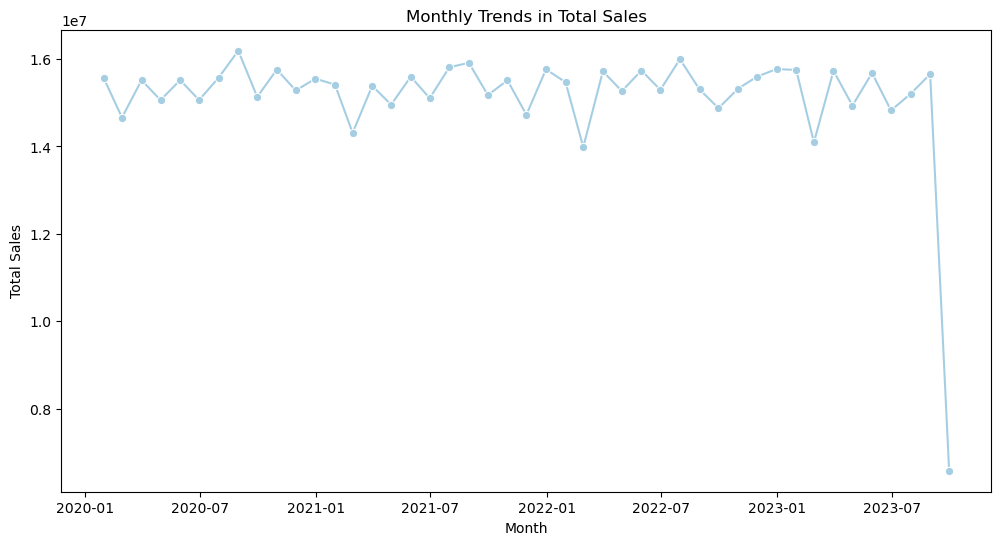

In [30]:
# Set 'Purchase Date' as the index
df.set_index('Purchase Date', inplace=True)

# Resample the data to get monthly total sales
monthly_total_sales = df['Total Purchase Amount'].resample('M').sum()

# Plotting the time series
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_total_sales.index, y=monthly_total_sales.values, marker='o')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Trends in Total Sales')

# Show the plot
plt.show()

### Trends in returns over time

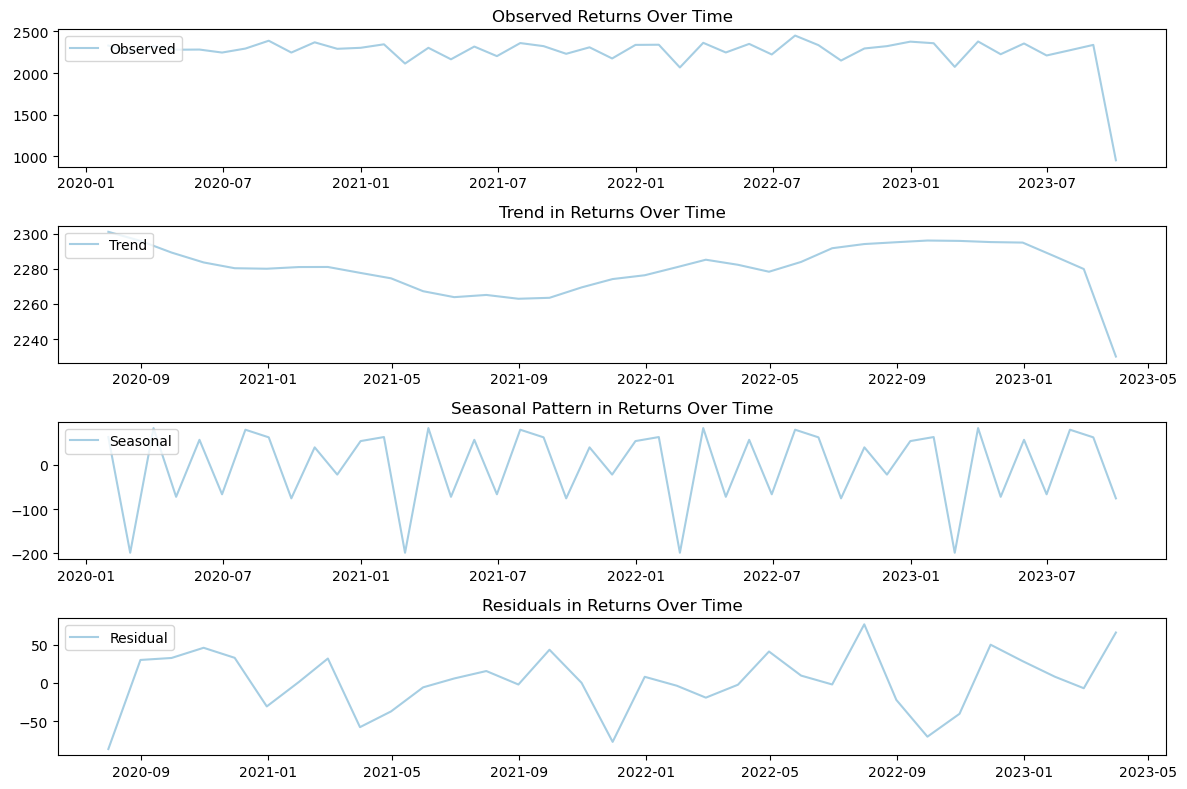

In [31]:
# Resample the data to get monthly returns
monthly_returns = df['Returns'].resample('M').sum()

# Decompose the time series into trend, seasonal, and residual components
result = sm.tsa.seasonal_decompose(monthly_returns, model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
plt.title('Observed Returns Over Time')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend in Returns Over Time')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Pattern in Returns Over Time')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residuals in Returns Over Time')

plt.tight_layout()
plt.show()

### Customer Segmentation based on Total Purchases and Average Purchase Amount

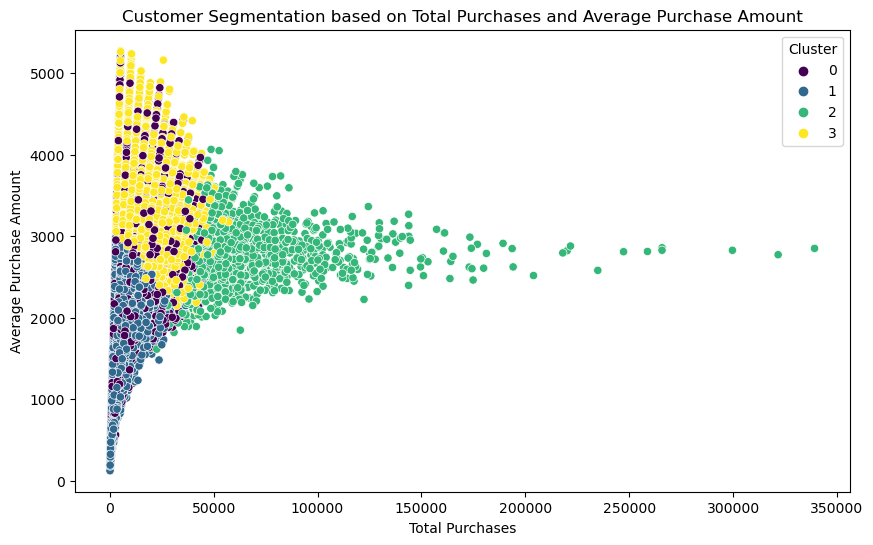

   Cluster  Total Purchases  Average Purchase Amount  Total Returns  \
0        0     16509.592967              2734.268483       2.394202   
1        1     10309.408296              2114.593116       1.886231   
2        2     62405.600263              2782.800951       9.948718   
3        3     18606.524239              3198.061539       2.467153   

   Churn Status  
0      1.000000  
1      0.002044  
2      0.562788  
3      0.000000  


In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Create a customer-level dataset with relevant metrics for segmentation
customer_data = df.groupby('Customer Name').agg({
    'Total Purchase Amount': ['sum', 'mean'],
    'Returns': 'sum',
    'Churn': 'max'
}).reset_index()
customer_data.columns = ['Customer Name', 'Total Purchases', 'Average Purchase Amount', 'Total Returns', 'Churn Status']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Total Purchases', 'Average Purchase Amount', 'Total Returns', 'Churn Status']])

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data_imputed)

# Visualize and interpret the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Total Purchases', y='Average Purchase Amount', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation based on Total Purchases and Average Purchase Amount')
plt.show()

# Analyze other metrics by cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'Total Purchases': 'mean',
    'Average Purchase Amount': 'mean',
    'Total Returns': 'mean',
    'Churn Status': 'mean'
}).reset_index()

print(cluster_summary)

### Correlation Matrix Heatmap

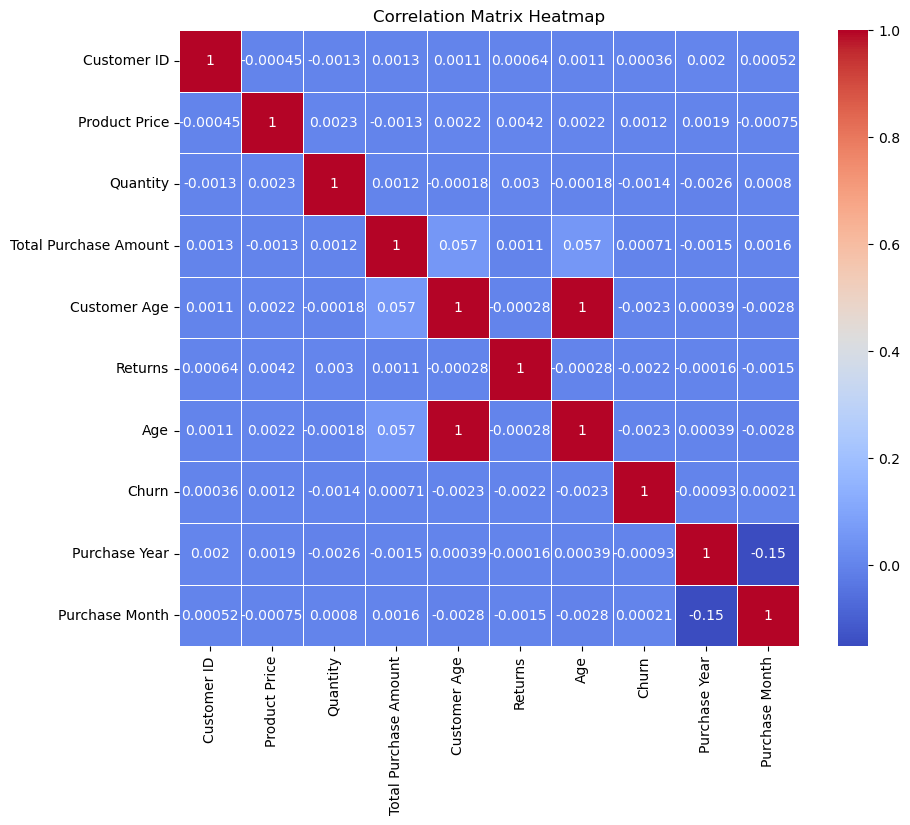

In [33]:
# Drop non-numeric columns (if any)
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a seaborn heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Set title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

## 1) Discuss and explain the purpose of a recommendation system for online retail business in machine learning. Train and test machine learning models for the user-user or item-item collaborative filtering. Justify your recommendations for the considered scenario by providing a conceptual insight.


I'll simulate user interactions based on customer purchase history and use customer and product information for collaborative filtering.

In [34]:
# Select relevant columns
df_rating = df[['Customer ID', 'Product Category', 'Total Purchase Amount']]

# Group by 'Customer ID' and 'Product Category', and calculate the mean 'Total Purchase Amount'
average_purchase_amount = df_rating.groupby(['Customer ID', 'Product Category'])['Total Purchase Amount'].mean().reset_index()

# Divide 'Total Purchase Amount' into 5 groups (bins)
average_purchase_amount['Rating'] = pd.cut(average_purchase_amount['Total Purchase Amount'], bins=5, labels=[1, 2, 3, 4, 5])

# Merge the ratings with the original DataFrame
df_with_ratings = pd.merge(df, average_purchase_amount[['Customer ID', 'Product Category', 'Rating']], 
                           on=['Customer ID', 'Product Category'], how='left')

# Display the resulting DataFrame with the 'Rating' column
print(df_with_ratings.head())

   Customer ID Product Category  Product Price  Quantity  \
0        44605             Home            177         1   
1        44605      Electronics            174         3   
2        44605            Books            413         1   
3        44605      Electronics            396         3   
4        44605            Books            259         4   

   Total Purchase Amount Payment Method  Customer Age  Returns Customer Name  \
0                   2427         PayPal            31      1.0   John Rivera   
1                   2448         PayPal            31      1.0   John Rivera   
2                   2345    Credit Card            31      1.0   John Rivera   
3                    937           Cash            31      0.0   John Rivera   
4                   2598         PayPal            31      1.0   John Rivera   

   Age  Gender  Churn  Purchase Year  Purchase Month Rating  
0   31  Female      0           2023               5      3  
1   31  Female      0           20

In [35]:
df_with_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 0 to 249999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Customer ID            250000 non-null  int64   
 1   Product Category       250000 non-null  object  
 2   Product Price          250000 non-null  int64   
 3   Quantity               250000 non-null  int64   
 4   Total Purchase Amount  250000 non-null  int64   
 5   Payment Method         250000 non-null  object  
 6   Customer Age           250000 non-null  int64   
 7   Returns                250000 non-null  float64 
 8   Customer Name          250000 non-null  object  
 9   Age                    250000 non-null  int64   
 10  Gender                 250000 non-null  object  
 11  Churn                  250000 non-null  int64   
 12  Purchase Year          250000 non-null  int64   
 13  Purchase Month         250000 non-null  int64   
 14  Rating              

In [47]:
# Convert 'Rating' to numeric for the entire dataset
df_with_ratings['Rating'] = pd.to_numeric(df_with_ratings['Rating'], errors='coerce')

In [48]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df_with_ratings, test_size=0.25, random_state=42)

# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Function that computes the root mean squared error (or RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define the baseline model to always return a default rating (e.g., 3.0)
def baseline(user_id, product_category):
    return 3.0

# Function to compute the RMSE score obtained on the testing set by a model
def score(cf_model):
    # Construct a list of user-product_category tuples from the testing dataset
    id_pairs = zip(test_data['Customer ID'], test_data['Product Category'])
    
    # Predict the rating for every user-product_category tuple
    y_pred = np.array([cf_model(user, category) for (user, category) in id_pairs])
    
    # Extract the actual ratings given by the users in the test data
    y_true = np.array(test_data['Rating'])
    
    # Return the final RMSE score
    return rmse(y_true, y_pred)

# Example: Calculate the RMSE for the baseline model
baseline_rmse = score(baseline)
print(f'RMSE for Baseline Model: {baseline_rmse}')

RMSE for Baseline Model: 1.066193228265871


### Ratings Matrix

In [49]:
# Create a user-item matrix (pivot table)
ratings_matrix = train_data.pivot_table(index='Customer ID', columns='Product Category', values='Rating', fill_value=0)

In [50]:
# Display the ratings matrix
print("Ratings Matrix:")
print(ratings_matrix.head())

Ratings Matrix:
Product Category  Books  Clothing  Electronics  Home
Customer ID                                         
1                     5         0            1     0
2                     5         0            2     0
3                     0         2            4     2
4                     0         3            1     1
5                     4         0            0     1


### Mean

In [51]:
# Function that computes the root mean squared error (or RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# User-Based Collaborative Filter using Mean Ratings
def cf_user_mean(user_id, product_category):
    # Check if product_category exists in ratings_matrix
    if product_category in ratings_matrix.columns:
        # Compute the mean of all the ratings given to the product_category
        mean_rating = ratings_matrix[product_category].mean()
    else:
        # Default to a rating of 3.0 in the absence of any information
        mean_rating = 3.0
    
    return mean_rating

# Function to compute the RMSE score obtained on the testing set by a model
def score(cf_model):
    # Construct a list of user-product_category tuples from the testing dataset
    id_pairs = zip(test_data['Customer ID'], test_data['Product Category'])
    
    # Predict the rating for every user-product_category tuple using the Mean model
    mean_pred = np.array([cf_model(user, category) for (user, category) in id_pairs])
    
    # Extract the actual ratings given by the users in the test data
    y_true = np.array(test_data['Rating'])
    
    # Return the final RMSE score for the Mean model
    return rmse(y_true, mean_pred)

# Calculate the RMSE for the Mean model
mean_rmse = score(cf_user_mean)
print(f'RMSE for Mean Model: {mean_rmse}')

RMSE for Mean Model: 1.5483743284373739


### Weighted Mean

In [54]:
from scipy.sparse import csr_matrix

# Assuming ratings_matrix is your user-item matrix
sparse_ratings_matrix = csr_matrix(ratings_matrix.values)

# Compute cosine similarity using sparse matrix
cosine_similarity_sparse = cosine_similarity(sparse_ratings_matrix)

MemoryError: Unable to allocate 7.84 GiB for an array with shape (2104815693,) and data type int32

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

# User-Based Collaborative Filter using Weighted Mean Ratings and Cosine Similarity
def cf_user_cosine_similarity(user_id, product_category):
    # Check if product_category exists in ratings_matrix
    if product_category in ratings_matrix.columns:
        # Get the ratings given by the user for the product_category
        user_ratings = ratings_matrix.loc[user_id, :].values.reshape(1, -1)
        
        # Get the ratings for all users for the product_category
        all_users_ratings = ratings_matrix.values
        
        # Compute cosine similarity between the user and all other users
        similarities = cosine_similarity(user_ratings, all_users_ratings).flatten()
        
        # Use similarities as weights and compute the weighted mean
        weighted_mean = np.sum(similarities * all_users_ratings[:, ratings_matrix.columns == product_category]) / np.sum(similarities)
    else:
        # Default to a rating of 3.0 in the absence of any information
        weighted_mean = 3.0
    
    return weighted_mean

# Function to compute the RMSE score obtained on the testing set by a model
def score(cf_model):
    # Construct a list of user-product_category tuples from the testing dataset
    id_pairs = zip(test_data['Customer ID'], test_data['Product Category'])
    
    # Predict the rating for every user-product_category tuple using the Cosine Similarity model
    cosine_similarity_pred = np.array([cf_model(user, category) for (user, category) in id_pairs])
    
    # Extract the actual ratings given by the users in the test data
    y_true = np.array(test_data['Rating'])
    
    # Return the final RMSE score for the Cosine Similarity model
    return rmse(y_true, cosine_similarity_pred)

# Calculate the RMSE for the Cosine Similarity model
cosine_similarity_rmse = score(cf_user_cosine_similarity)
print(f'RMSE for Cosine Similarity Model: {cosine_similarity_rmse}')

MemoryError: Unable to allocate 17.7 GiB for an array with shape (48791, 48791) and data type float64

### Demographics